# Activity analysis

We analyse patterns of activity of participants using 

https://www.python-graph-gallery.com/heatmap-for-timeseries-matplotlib

In [2]:
# load data 

import glob2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib import pyplot
from scipy import stats

warnings.filterwarnings("ignore")

# upload all the datasets and making a variable with the name of city
dataframes = []

for file in glob2.glob('../Data/*.csv'):
    df = pd.read_csv(file)
    if any(city in file for city in ['London', 'Lonson']):
        df['city'] = np.repeat('London', df.shape[0])
    elif 'Los Angeles' in file:
        df['city'] = np.repeat('Los Angeles', df.shape[0])
    else:
        df['city'] = np.repeat('San Francisco', df.shape[0])
    dataframes.append(df)

C:\Users\tupikina\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [4]:
# merging all the dfs
data = pd.concat(dataframes, axis=0).reset_index()

data.head()

,index,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,...,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,city
0,0,11479007,2018-04-27 7:52:34 am BST,2018-04-27,2018-04-27 07:52:34 UTC,UTC,159021,muki,2018-04-27 07:06:17 UTC,2018-04-27 09:26:56 UTC,...,NaN,False,gps,gps,lesser celandine,Ficaria verna,lesser celandine,Plantae,204321.0,London
1,1,11480212,2018-04-27 8:39:41 am BST,2018-04-27,2018-04-27 07:39:41 UTC,London,664459,lucyrobinsonnhm,2018-04-27 08:02:52 UTC,2019-01-29 21:16:34 UTC,...,open,False,gps,gps,Pigeon biset domestique,Columba livia domestica,Feral Pigeon,Aves,122767.0,London
2,2,11480902,Fri Apr 27 2018 08:34:31 GMT+0100 (GMT+1),2018-04-27,2018-04-27 06:34:31 UTC,Amsterdam,908315,tess26,2018-04-27 08:42:01 UTC,2018-04-27 11:01:49 UTC,...,NaN,False,NaN,NaN,NaN,Hyacinthoides hispanica,Spanish Bluebell,Plantae,57635.0,London
3,3,11481097,Fri Apr 27 2018 09:54:35 GMT+0100 (GMT+1),2018-04-27,2018-04-27 07:54:35 UTC,Amsterdam,796473,bryonycross,2018-04-27 08:54:45 UTC,2018-04-27 20:23:41 UTC,...,NaN,False,NaN,NaN,Green Alkanet,Pentaglottis sempervirens,Green Alkanet,Plantae,166466.0,London
4,4,11482247,2018-04-27 8:42:21 am BST,2018-04-27,2018-04-27 07:42:21 UTC,London,664459,lucyrobinsonnhm,2018-04-27 10:09:55 UTC,2018-04-27 15:37:31 UTC,...,NaN,False,gps,gps,London Plane,Platanus × hispanica,London Plane,Plantae,552449.0,London


In [9]:
# field "created_at" is of date format

def single_plot(data, month, year, ax):
    data = data[(data["created_at"].dt.year == year) & (data["date"].dt.month == month)]

    hour = data["hour"]
    day = data["date"].dt.day
    temp = data["temp"]
    temp = temp.values.reshape(24, len(day.unique()), order="F")
    
    xgrid = np.arange(day.max() + 1) + 1
    ygrid = np.arange(25)
    
    ax.pcolormesh(xgrid, ygrid, temp, cmap="magma", vmin=MIN_TEMP, vmax=MAX_TEMP)
    # Invert the vertical axis
    ax.set_ylim(24, 0)
    # Set tick positions for both axes
    ax.yaxis.set_ticks([i for i in range(24)])
    ax.xaxis.set_ticks([10, 20, 30])
    # Remove ticks by setting their length to 0
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    # Remove all spines
    ax.set_frame_on(False)
    
    


AttributeError: Can only use .dt accessor with datetimelike values

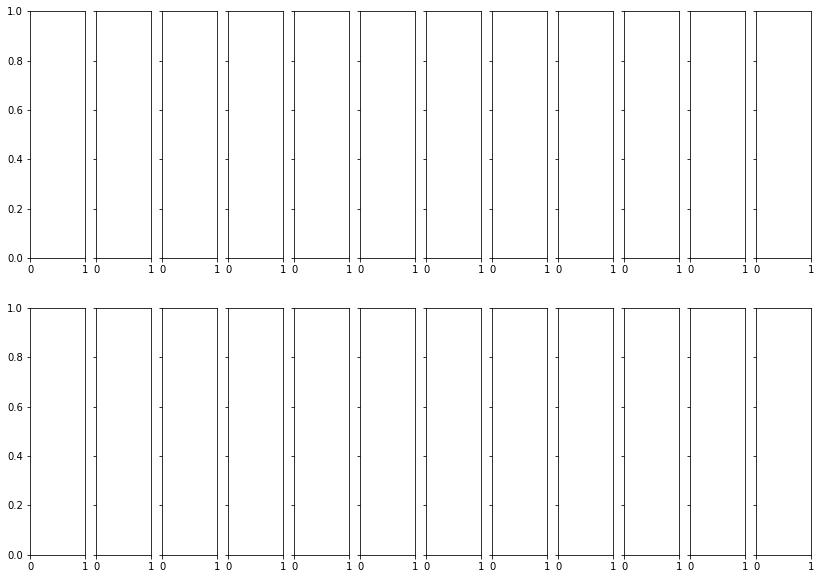

In [10]:
#datanew = single_plot(data, month, year, ax)


fig, axes = plt.subplots(2, 12, figsize=(14, 10), sharey=True)

for i, year in enumerate([2018, 2020]):
    for j, month in enumerate(range(1, 13)):
        single_plot(data, month, year, axes[i, j])

# Adjust margin and space between subplots
# Extra space is on the left to add a label
fig.subplots_adjust(left=0.05, right=0.98, top=0.9, hspace=0.08, wspace=0.04)

